# Case Study Notebook

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px

In [4]:
pd.set_option('display.max_column', 500)

# Loading data and overview

In [7]:
df = pd.read_csv('Servicing - Product homework dataset.csv')

In [8]:
df.head()

,user_id,request_id,target_recipient_id,date_user_created,addr_country_code,addr_city,recipient_country_code,flag_personal_business,payment_type,date_request_submitted,date_request_received,date_request_transferred,date_request_cancelled,invoice_value,invoice_value_cancel,flag_transferred,payment_status,ccy_send,ccy_target,transfer_to_self,sending_bank_name,sending_bank_country,payment_reference_classification,device,transfer_sequence,days_since_previous_req,first_attempt_date,first_success_date
0,77656618388e134648db01eecf7e79ee,2e9f911150e3a79e8d71a35779706e4c,992e0a729d6380d3b50aef5aa7c22572,27/01/2014 15:02,DEU,Berlin,GB,Personal,Direct Debit,26/08/2016 07:35,01/09/2016 08:31,01/09/2016 09:28,NaN,155.812339,NaN,1,Transferred,EUR,GBP,Other Recipient,Other/unknown,Other/unknown,gift,Desktop Web,55.0,0.0,27/01/2014 16:01,27/01/2014 16:17
1,a2497e0c763a7e5640fbf05e53fe0466,69cdf2f9ab2f59d10b636dc86bc9d7b7,02878ea857dbc90b2ed89b8f3488d501,12/10/2015 15:35,CAN,toronto,US,Personal,NaN,23/10/2016 22:54,NaN,NaN,07/11/2016 08:07,NaN,59.712044,0,Cancelled,CAD,USD,Other Recipient,Other/unknown,Other/unknown,expense,iOS App,1.0,NaN,23/10/2016 22:54,27/10/2016 16:45
2,759735d092819085c125a5cf81faf24b,5d7d30d709268f22f1a73ddbd6601690,927d3808cdc31d61226ae7c80bc8de16,04/10/2016 11:42,GBR,bolton,PT,Personal,Bank Transfer,26/10/2016 13:42,26/10/2016 14:06,26/10/2016 14:20,NaN,5000.000000,NaN,1,Transferred,GBP,EUR,Self-recipient: Exact name match,NATIONAL WESTMINSTER BANK PLC,GB,blank,Android App,10.0,1.0,04/10/2016 12:27,04/10/2016 16:59
3,df9627db375322e65f4648ca72f4c630,0df2fc0a4a31595678cd1de3fad57e15,0411b7eb4c220a14876e77da8125f79b,17/10/2014 00:27,GBR,swindon,IN,Personal,Cards,28/01/2015 23:36,28/01/2015 23:36,29/01/2015 07:14,NaN,150.000000,NaN,1,Transferred,GBP,INR,Self-recipient: Email match,Other/unknown,Other/unknown,loan,Mobile Web,9.0,2.0,19/10/2014 22:00,24/11/2014 07:32
4,5672b2f16063ed75fbb304fee57c024b,7dcbf32659ae5ef61e10e5174a314d7d,dc248a1266709a71e45c40f33056bbb1,12/08/2015 07:45,FRA,paris,GB,Personal,Cards,18/08/2015 08:55,18/08/2015 09:12,18/08/2015 09:44,NaN,600.130515,NaN,1,Transferred,EUR,GBP,Other Recipient,LA BANQUE POSTALE,FR,blank,Desktop Web,1.0,NaN,18/08/2015 08:55,18/08/2015 09:44


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   user_id                           100000 non-null  object 
 1   request_id                        100000 non-null  object 
 2   target_recipient_id               100000 non-null  object 
 3   date_user_created                 100000 non-null  object 
 4   addr_country_code                 100000 non-null  object 
 5   addr_city                         99998 non-null   object 
 6   recipient_country_code            100000 non-null  object 
 7   flag_personal_business            100000 non-null  object 
 8   payment_type                      81223 non-null   object 
 9   date_request_submitted            100000 non-null  object 
 10  date_request_received             78614 non-null   object 
 11  date_request_transferred          77376 non-null   ob

In [12]:
# Modify all dates to datetime
df['date_user_created'] = pd.to_datetime(df['date_user_created'], dayfirst=True)
df['date_request_submitted'] = pd.to_datetime(df['date_request_submitted'], dayfirst=True)
df['date_request_received'] = pd.to_datetime(df['date_request_received'], dayfirst=True)
df['date_request_transferred'] = pd.to_datetime(df['date_request_transferred'], dayfirst=True)
df['date_request_cancelled'] = pd.to_datetime(df['date_request_cancelled'], dayfirst=True)
df['first_attempt_date'] = pd.to_datetime(df['first_attempt_date'], dayfirst=True)
df['first_success_date'] = pd.to_datetime(df['first_success_date'], dayfirst=True)

In [14]:
df.describe()

,date_user_created,date_request_submitted,date_request_received,date_request_transferred,date_request_cancelled,invoice_value,invoice_value_cancel,flag_transferred,transfer_sequence,days_since_previous_req,first_attempt_date,first_success_date
count,100000,100000,78614,77376,22259,77737.000000,2.225900e+04,100000.000000,99998.000000,84777.000000,99998,95461
mean,2015-05-05 07:20:52.927200512,2016-01-01 21:45:08.538599936,2016-01-03 00:15:03.327651328,2016-01-03 14:54:39.430055680,2015-12-30 03:34:58.126599936,1397.064560,2.844942e+03,0.773760,53.811416,27.520931,2015-05-26 00:01:01.554630912,2015-05-28 20:34:46.553880576
min,2011-01-23 13:54:00,2011-02-04 12:28:00,2011-02-08 18:45:00,2011-02-08 21:04:00,2012-02-28 17:26:00,0.781898,9.109000e-02,0.000000,1.000000,0.000000,2010-05-28 09:26:00,2010-06-01 19:25:00
25%,2014-10-06 09:02:00,2015-07-27 14:51:45,2015-07-29 21:10:30,2015-07-30 11:54:30,2015-07-20 11:39:00,153.000000,2.062090e+02,1.000000,3.000000,1.000000,2014-10-27 14:27:15,2014-10-30 13:10:00
50%,2015-05-31 08:46:00,2016-03-01 09:14:30,2016-03-05 08:03:30,2016-03-07 09:42:30,2016-02-10 08:33:00,425.520000,6.700000e+02,1.000000,7.000000,10.000000,2015-06-29 12:33:00,2015-07-02 08:16:00
75%,2016-01-07 13:13:15,2016-08-05 17:03:00,2016-08-08 11:59:45,2016-08-08 16:44:00,2016-07-29 13:45:00,1079.570000,1.600000e+03,1.000000,18.000000,29.000000,2016-01-29 23:50:45,2016-02-02 09:46:00
max,2016-12-06 09:14:00,2016-12-06 15:26:00,2016-12-06 15:27:00,2016-12-06 15:22:00,2016-12-06 15:11:00,688221.600000,1.013231e+06,1.000000,19069.000000,1274.000000,2016-12-06 13:58:00,2016-12-06 15:05:00
std,NaN,NaN,NaN,NaN,NaN,6260.144476,2.220656e+04,0.418398,575.394210,58.746124,NaN,NaN


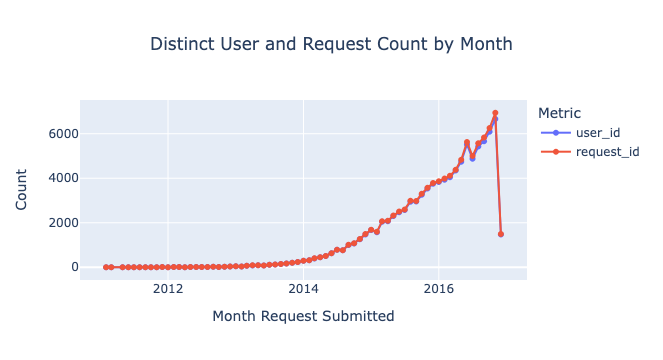

In [19]:
# Creating a new column to aggregate by month
df['month_request_submitted'] = df['date_request_submitted'].dt.to_period('M')

# Aggregating the results and calculating key statistics per month
result_df = df.groupby('month_request_submitted').agg({
    'user_id': 'nunique',          # Count distinct user_id
    'request_id': 'nunique',       # Count distinct request_id
    'invoice_value': 'sum',        # Sum invoice_value
    'invoice_value_cancel': 'sum'  # Sum invoice_value_cancel
}).sort_values(by = 'month_request_submitted', ascending = False).reset_index()

# Transform new field into a string to create the required graph
result_df['month_request_submitted'] = result_df['month_request_submitted'].astype(str)

# Create the time line graph with the key metrics
fig1 = px.line(
    result_df,
    x='month_request_submitted',
    y=['user_id', 'request_id'],
    markers=True,
    title='Distinct User and Request Count by Month',
    labels={
        'month_request_submitted': 'Month Request Submitted',
        'value': 'Count',
        'variable': 'Metric'
    }
)

# Centering the title 
fig1.update_layout(
    title={'x': 0.5},
)

fig1.show()

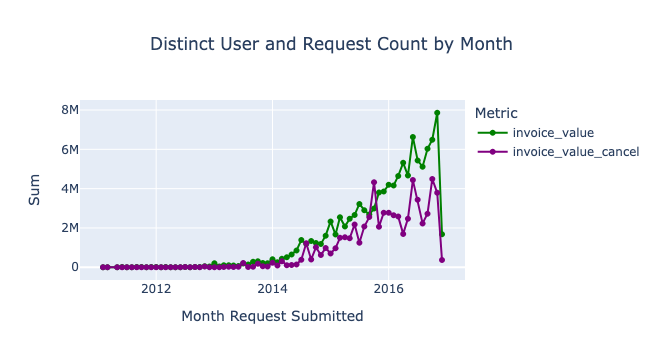

In [21]:
# Create the time line graph with the key metrics
fig2 = px.line(
    result_df,
    x='month_request_submitted',
    y=['invoice_value', 'invoice_value_cancel'],
    markers=True,
    title='Distinct User and Request Count by Month',
    labels={
        'month_request_submitted': 'Month Request Submitted',
        'value': 'Sum',
        'variable': 'Metric'
    },
    color_discrete_map = {'invoice_value':'green', 'invoice_value_cancel':'purple'}
)

fig2.update_layout(
    title={'x': 0.5},
)

fig2.show()

In [23]:
result = df.groupby('ccy_target').agg({'user_id':'nunique', 'request_id':'nunique', 'invoice_value':'sum', 'invoice_value_cancel':'sum'})
result['avg_invoice_value'] = (result['invoice_value']+result['invoice_value_cancel'])/result['request_id']
result = result.sort_values(by = 'avg_invoice_value', ascending = False)
result

,user_id,request_id,invoice_value,invoice_value_cancel,avg_invoice_value
ccy_target,,,,,
VND,8,9,6.479667e+03,1.013305e+06,113309.389154
CLP,36,36,1.317075e+04,6.715772e+05,19020.776046
SGD,312,330,5.520754e+05,8.280464e+05,4182.187266
NOK,260,287,5.690454e+05,5.407461e+05,3866.869104
JPY,48,51,1.570486e+05,7.011450e+03,3216.863820
USD,7338,7945,1.394704e+07,7.701109e+06,2724.751379
CHF,481,515,9.349474e+05,4.220245e+05,2634.896929
SEK,743,841,1.335092e+06,5.744683e+05,2270.583197
TRY,325,379,2.067490e+05,6.313839e+05,2211.432515


# Missing data check and cleaning

In [26]:
# Do columns contain null
print(df.isnull().any())

user_id                             False
request_id                          False
target_recipient_id                 False
date_user_created                   False
addr_country_code                   False
addr_city                            True
recipient_country_code              False
flag_personal_business              False
payment_type                         True
date_request_submitted              False
date_request_received                True
date_request_transferred             True
date_request_cancelled               True
invoice_value                        True
invoice_value_cancel                 True
flag_transferred                    False
payment_status                      False
ccy_send                            False
ccy_target                          False
transfer_to_self                    False
sending_bank_name                   False
sending_bank_country                False
payment_reference_classification    False
device                            

In [28]:
df[df['addr_city'].isnull()]

,user_id,request_id,target_recipient_id,date_user_created,addr_country_code,addr_city,recipient_country_code,flag_personal_business,payment_type,date_request_submitted,date_request_received,date_request_transferred,date_request_cancelled,invoice_value,invoice_value_cancel,flag_transferred,payment_status,ccy_send,ccy_target,transfer_to_self,sending_bank_name,sending_bank_country,payment_reference_classification,device,transfer_sequence,days_since_previous_req,first_attempt_date,first_success_date,month_request_submitted
4970,82ae1744f626f9a39676242adb4f6de2,7ec86484d4729f8acce7763ce59054ec,85b4f32cb42bd60c1a5207dcbbe8cfa7,2016-08-16 03:10:00,AUS,NaN,IE,Personal,Cards,2016-10-11 09:29:00,2016-10-11 10:49:00,2016-10-11 10:49:00,NaT,93.517237,NaN,1,Transferred,AUD,EUR,Self-recipient: Email match,Other/unknown,Other/unknown,blank,iOS App,9.0,18.0,2016-08-23 02:10:00,2016-08-24 14:08:00,2016-10
12544,176fcf2622a20bb40e34c283403c715a,979fbbec1143b3e8fe59538bb5a7c09f,9e8aa8f6b47f1904e749bd9021ad89b3,2015-07-24 21:37:00,USA,NaN,IN,Personal,Direct Debit,2015-07-24 22:02:00,2015-07-24 22:14:00,2015-07-29 07:37:00,NaT,1482.899907,NaN,1,Transferred,USD,INR,Other Recipient,Other/unknown,Other/unknown,blank,Desktop Web,1.0,NaN,2015-07-24 22:02:00,2015-07-29 07:37:00,2015-07


In [30]:
df[df['payment_type'].isnull() & df['flag_transferred'] != 0]


,user_id,request_id,target_recipient_id,date_user_created,addr_country_code,addr_city,recipient_country_code,flag_personal_business,payment_type,date_request_submitted,date_request_received,date_request_transferred,date_request_cancelled,invoice_value,invoice_value_cancel,flag_transferred,payment_status,ccy_send,ccy_target,transfer_to_self,sending_bank_name,sending_bank_country,payment_reference_classification,device,transfer_sequence,days_since_previous_req,first_attempt_date,first_success_date,month_request_submitted


In [32]:
df[df['date_request_received'].isnull() & df['flag_transferred'] != 0]

,user_id,request_id,target_recipient_id,date_user_created,addr_country_code,addr_city,recipient_country_code,flag_personal_business,payment_type,date_request_submitted,date_request_received,date_request_transferred,date_request_cancelled,invoice_value,invoice_value_cancel,flag_transferred,payment_status,ccy_send,ccy_target,transfer_to_self,sending_bank_name,sending_bank_country,payment_reference_classification,device,transfer_sequence,days_since_previous_req,first_attempt_date,first_success_date,month_request_submitted
35461,bcf742136651284a90ae0d264b77c980,4b6919643f6f154958989493784a62e0,3b1654252422061fbcc43a2e93286dfb,2016-05-22 10:52:00,ESP,sueca,ES,Personal,Direct Debit,2016-05-26 07:39:00,NaT,2016-05-26 12:06:00,NaT,1704.625997,NaN,1,Transferred,USD,EUR,Self-recipient: Email match,Other/unknown,Other/unknown,blank,Desktop Web,3.0,0.0,2016-05-24 08:26:00,2016-05-26 12:06:00,2016-05
90242,ffac85376ef724b262385ed802fde10d,331c3559bd95d6eae0d6919026e1b972,ac93200d688db5e6bf5e06e00f26a488,2014-12-08 15:09:00,DEU,Berlin,DE,Personal,Direct Debit,2016-09-26 14:35:00,NaT,2016-09-27 07:18:00,NaT,1966.978393,NaN,1,Transferred,USD,EUR,Self-recipient: Exact name match,Other/unknown,Other/unknown,blank,Desktop Web,13.0,0.0,2014-12-08 16:55:00,2015-01-13 06:48:00,2016-09


In [34]:
df[df['date_request_transferred'].isnull() & df['flag_transferred'] != 0]

,user_id,request_id,target_recipient_id,date_user_created,addr_country_code,addr_city,recipient_country_code,flag_personal_business,payment_type,date_request_submitted,date_request_received,date_request_transferred,date_request_cancelled,invoice_value,invoice_value_cancel,flag_transferred,payment_status,ccy_send,ccy_target,transfer_to_self,sending_bank_name,sending_bank_country,payment_reference_classification,device,transfer_sequence,days_since_previous_req,first_attempt_date,first_success_date,month_request_submitted


In [36]:
df[df['date_request_cancelled'].isnull() & df['payment_status'] == 'Cancelled']

,user_id,request_id,target_recipient_id,date_user_created,addr_country_code,addr_city,recipient_country_code,flag_personal_business,payment_type,date_request_submitted,date_request_received,date_request_transferred,date_request_cancelled,invoice_value,invoice_value_cancel,flag_transferred,payment_status,ccy_send,ccy_target,transfer_to_self,sending_bank_name,sending_bank_country,payment_reference_classification,device,transfer_sequence,days_since_previous_req,first_attempt_date,first_success_date,month_request_submitted


In [38]:
df[df['invoice_value'].isnull() & df['payment_status'] == 'Cancelled']

,user_id,request_id,target_recipient_id,date_user_created,addr_country_code,addr_city,recipient_country_code,flag_personal_business,payment_type,date_request_submitted,date_request_received,date_request_transferred,date_request_cancelled,invoice_value,invoice_value_cancel,flag_transferred,payment_status,ccy_send,ccy_target,transfer_to_self,sending_bank_name,sending_bank_country,payment_reference_classification,device,transfer_sequence,days_since_previous_req,first_attempt_date,first_success_date,month_request_submitted


In [40]:
df[df['invoice_value_cancel'].isnull() & df['payment_status'] == 'Pending']

,user_id,request_id,target_recipient_id,date_user_created,addr_country_code,addr_city,recipient_country_code,flag_personal_business,payment_type,date_request_submitted,date_request_received,date_request_transferred,date_request_cancelled,invoice_value,invoice_value_cancel,flag_transferred,payment_status,ccy_send,ccy_target,transfer_to_self,sending_bank_name,sending_bank_country,payment_reference_classification,device,transfer_sequence,days_since_previous_req,first_attempt_date,first_success_date,month_request_submitted


In [42]:
df[df['transfer_sequence'].isnull()]

,user_id,request_id,target_recipient_id,date_user_created,addr_country_code,addr_city,recipient_country_code,flag_personal_business,payment_type,date_request_submitted,date_request_received,date_request_transferred,date_request_cancelled,invoice_value,invoice_value_cancel,flag_transferred,payment_status,ccy_send,ccy_target,transfer_to_self,sending_bank_name,sending_bank_country,payment_reference_classification,device,transfer_sequence,days_since_previous_req,first_attempt_date,first_success_date,month_request_submitted
37364,4094b0ae080a0528d599f80a8ce5a44e,fb9980731e708746d655462282e4f3a6,5de922ab7aa9b49677d393cd3dd099d0,2015-05-09 18:32:00,GBR,London,NL,Business,NaN,2016-12-06 15:26:00,NaT,NaT,NaT,NaN,NaN,0,Pending,EUR,EUR,N.A. Sender or Recipient is business,Other/unknown,Other/unknown,Other/unknown,Desktop Web,NaN,NaN,NaT,NaT,2016-12
54111,1c77d7c06f5a28b88dbc6801441dea7c,7a06ed2c10652636f53bfec4e88b1dec,10c00ed3c6d552dae892aa80715e4119,2015-10-13 14:55:00,GBR,london,BR,Personal,Cards,2016-12-06 15:24:00,2016-12-06 15:24:00,NaT,NaT,NaN,NaN,0,Pending,GBP,BRL,N.A. Sender or Recipient is business,Other/unknown,Other/unknown,Other/unknown,iOS App,NaN,NaN,NaT,NaT,2016-12


In [44]:
df[df['invoice_value_cancel'].isnull() & df['invoice_value'].isnull()]

,user_id,request_id,target_recipient_id,date_user_created,addr_country_code,addr_city,recipient_country_code,flag_personal_business,payment_type,date_request_submitted,date_request_received,date_request_transferred,date_request_cancelled,invoice_value,invoice_value_cancel,flag_transferred,payment_status,ccy_send,ccy_target,transfer_to_self,sending_bank_name,sending_bank_country,payment_reference_classification,device,transfer_sequence,days_since_previous_req,first_attempt_date,first_success_date,month_request_submitted
37364,4094b0ae080a0528d599f80a8ce5a44e,fb9980731e708746d655462282e4f3a6,5de922ab7aa9b49677d393cd3dd099d0,2015-05-09 18:32:00,GBR,London,NL,Business,NaN,2016-12-06 15:26:00,NaT,NaT,NaT,NaN,NaN,0,Pending,EUR,EUR,N.A. Sender or Recipient is business,Other/unknown,Other/unknown,Other/unknown,Desktop Web,NaN,NaN,NaT,NaT,2016-12
37673,a71f6aa39219ee16b5cf3851e5740140,d58bcb3b3676d22faad15868d1b9fb02,999ecf189204f575084bb36c76a4e055,2014-03-20 17:55:00,CZE,Brno,LV,Personal,NaN,2016-12-06 15:18:00,NaT,NaT,NaT,NaN,NaN,0,Pending,CZK,EUR,N.A. Sender or Recipient is business,Other/unknown,Other/unknown,Other/unknown,Desktop Web,11.0,232.0,2014-04-14 22:30:00,2014-04-17 12:17:00,2016-12
54111,1c77d7c06f5a28b88dbc6801441dea7c,7a06ed2c10652636f53bfec4e88b1dec,10c00ed3c6d552dae892aa80715e4119,2015-10-13 14:55:00,GBR,london,BR,Personal,Cards,2016-12-06 15:24:00,2016-12-06 15:24:00,NaT,NaT,NaN,NaN,0,Pending,GBP,BRL,N.A. Sender or Recipient is business,Other/unknown,Other/unknown,Other/unknown,iOS App,NaN,NaN,NaT,NaT,2016-12
57821,4094b0ae080a0528d599f80a8ce5a44e,30ca3874578f47afda23ae2ac1167df8,1c9e4fc6761628db9c99adfb23c0cd71,2015-05-09 18:32:00,GBR,London,DE,Business,NaN,2016-12-06 15:15:00,NaT,NaT,NaT,NaN,NaN,0,Pending,EUR,EUR,N.A. Sender or Recipient is business,Other/unknown,Other/unknown,Other/unknown,Desktop Web,1849.0,0.0,2016-10-14 12:16:00,2016-11-25 17:31:00,2016-12


In [46]:
# Removing the 4 txns listed above due to lack of info on many fields. Very close to cut off date/time of dataset

df = df[~(df['invoice_value_cancel'].isnull() & df['invoice_value'].isnull())]
df

,user_id,request_id,target_recipient_id,date_user_created,addr_country_code,addr_city,recipient_country_code,flag_personal_business,payment_type,date_request_submitted,date_request_received,date_request_transferred,date_request_cancelled,invoice_value,invoice_value_cancel,flag_transferred,payment_status,ccy_send,ccy_target,transfer_to_self,sending_bank_name,sending_bank_country,payment_reference_classification,device,transfer_sequence,days_since_previous_req,first_attempt_date,first_success_date,month_request_submitted
0,77656618388e134648db01eecf7e79ee,2e9f911150e3a79e8d71a35779706e4c,992e0a729d6380d3b50aef5aa7c22572,2014-01-27 15:02:00,DEU,Berlin,GB,Personal,Direct Debit,2016-08-26 07:35:00,2016-09-01 08:31:00,2016-09-01 09:28:00,NaT,155.812339,NaN,1,Transferred,EUR,GBP,Other Recipient,Other/unknown,Other/unknown,gift,Desktop Web,55.0,0.0,2014-01-27 16:01:00,2014-01-27 16:17:00,2016-08
1,a2497e0c763a7e5640fbf05e53fe0466,69cdf2f9ab2f59d10b636dc86bc9d7b7,02878ea857dbc90b2ed89b8f3488d501,2015-10-12 15:35:00,CAN,toronto,US,Personal,NaN,2016-10-23 22:54:00,NaT,NaT,2016-11-07 08:07:00,NaN,59.712044,0,Cancelled,CAD,USD,Other Recipient,Other/unknown,Other/unknown,expense,iOS App,1.0,NaN,2016-10-23 22:54:00,2016-10-27 16:45:00,2016-10
2,759735d092819085c125a5cf81faf24b,5d7d30d709268f22f1a73ddbd6601690,927d3808cdc31d61226ae7c80bc8de16,2016-10-04 11:42:00,GBR,bolton,PT,Personal,Bank Transfer,2016-10-26 13:42:00,2016-10-26 14:06:00,2016-10-26 14:20:00,NaT,5000.000000,NaN,1,Transferred,GBP,EUR,Self-recipient: Exact name match,NATIONAL WESTMINSTER BANK PLC,GB,blank,Android App,10.0,1.0,2016-10-04 12:27:00,2016-10-04 16:59:00,2016-10
3,df9627db375322e65f4648ca72f4c630,0df2fc0a4a31595678cd1de3fad57e15,0411b7eb4c220a14876e77da8125f79b,2014-10-17 00:27:00,GBR,swindon,IN,Personal,Cards,2015-01-28 23:36:00,2015-01-28 23:36:00,2015-01-29 07:14:00,NaT,150.000000,NaN,1,Transferred,GBP,INR,Self-recipient: Email match,Other/unknown,Other/unknown,loan,Mobile Web,9.0,2.0,2014-10-19 22:00:00,2014-11-24 07:32:00,2015-01
4,5672b2f16063ed75fbb304fee57c024b,7dcbf32659ae5ef61e10e5174a314d7d,dc248a1266709a71e45c40f33056bbb1,2015-08-12 07:45:00,FRA,paris,GB,Personal,Cards,2015-08-18 08:55:00,2015-08-18 09:12:00,2015-08-18 09:44:00,NaT,600.130515,NaN,1,Transferred,EUR,GBP,Other Recipient,LA BANQUE POSTALE,FR,blank,Desktop Web,1.0,NaN,2015-08-18 08:55:00,2015-08-18 09:44:00,2015-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,c39e585ef0bb093e423a75e8a3d74c3d,2d9f3930cf83ab3fb1d6a14b42b2c6ce,c21b7d42d0cb67cbf5ce0a479f6dbac4,2014-03-10 12:11:00,GBR,Wembley,HU,Personal,Cards,2014-10-20 21:14:00,2014-10-20 21:15:00,2014-10-21 07:53:00,NaT,19.000000,NaN,1,Transferred,GBP,HUF,Other Recipient,Other/unknown,Other/unknown,blank,Desktop Web,3.0,3.0,2014-10-02 13:16:00,2014-10-02 14:12:00,2014-10
99996,52c3a9f1e015635324743087c740c8a8,5a7eda59e8695c87253d7cece9665fcc,3056e69236ff441c0b8b8c0e09f255a2,2015-11-19 20:03:00,GBR,Peterhead,PL,Personal,Cards,2016-04-15 05:22:00,2016-04-15 05:22:00,2016-04-15 06:36:00,NaT,200.000000,NaN,1,Transferred,GBP,PLN,Self-recipient: Exact name match,ROYAL BANK OF SCOTLAND PLC,GB,blank,Mobile Web,21.0,6.0,2015-11-19 20:25:00,2015-12-14 06:44:00,2016-04
99997,068fd3da986103729a9c558d217ca66c,73b43e68e21a3cda595b4204175adb1c,8aa083e482ef8fffc1dc57aae9df4098,2015-07-08 05:48:00,USA,Boulder,DE,Personal,NaN,2016-06-30 11:54:00,NaT,NaT,2016-07-01 05:27:00,NaN,1427.753547,0,Cancelled,USD,EUR,Self-recipient: Exact name match,Other/unknown,Other/unknown,blank,Desktop Web,11.0,0.0,2015-07-08 05:55:00,2016-01-20 07:22:00,2016-06
99998,cd80a491a39f84f0cb9e9fda6c7de95a,f59cab15bb69973e95a9583f17375023,56ded1634c35d7f9006938c0fa0ffa73,2015-05-01 08:17:00,AUS,Sydney,GB,Personal,NaN,2016-04-28 04:22:00,NaT,NaT,2016-04-28 07:34:00,NaN,1200.703500,0,Cancelled,AUD,GBP,"Family (Last Matches, 1st name different)",Other/unknown,Other/unknown,blank,Mobile Web,17.0,11.0,2015-05-01 08:

In [48]:
dspr_is_null = df[df['days_since_previous_req'].isnull()]

In [50]:
df[df['first_attempt_date'].isnull()]

,user_id,request_id,target_recipient_id,date_user_created,addr_country_code,addr_city,recipient_country_code,flag_personal_business,payment_type,date_request_submitted,date_request_received,date_request_transferred,date_request_cancelled,invoice_value,invoice_value_cancel,flag_transferred,payment_status,ccy_send,ccy_target,transfer_to_self,sending_bank_name,sending_bank_country,payment_reference_classification,device,transfer_sequence,days_since_previous_req,first_attempt_date,first_success_date,month_request_submitted


# Hypothesis 1:
### first_success_date is null

In [53]:
fsd_is_null = df[df['first_success_date'].isnull()]
fsd_is_null.agg({'user_id':'nunique', 'request_id':'nunique'})

user_id       4319
request_id    4537
dtype: int64

In [55]:
fsd_is_null.sort_values(by = 'transfer_sequence', ascending = False)

,user_id,request_id,target_recipient_id,date_user_created,addr_country_code,addr_city,recipient_country_code,flag_personal_business,payment_type,date_request_submitted,date_request_received,date_request_transferred,date_request_cancelled,invoice_value,invoice_value_cancel,flag_transferred,payment_status,ccy_send,ccy_target,transfer_to_self,sending_bank_name,sending_bank_country,payment_reference_classification,device,transfer_sequence,days_since_previous_req,first_attempt_date,first_success_date,month_request_submitted
74018,8917c69f0a728519439d93ba9b49005a,2b85473c15dd2240e3f187adf96b66c2,81be15cefd8da370373fd4105fea03f8,2016-11-15 07:45:00,EST,Tallinn,GB,Personal,NaN,2016-11-16 09:50:00,NaT,NaT,2016-11-23 10:13:00,NaN,3.612794,0,Cancelled,EUR,GBP,Self-recipient: Exact name match,Other/unknown,Other/unknown,test,Desktop Web,11166.0,0.0,2016-11-15 09:12:00,NaT,2016-11
97986,8917c69f0a728519439d93ba9b49005a,44ad846b7ae5153cd4ac002dfaac3e54,81be15cefd8da370373fd4105fea03f8,2016-11-15 07:45:00,EST,Tallinn,GB,Personal,NaN,2016-11-16 09:50:00,NaT,NaT,2016-11-23 10:13:00,NaN,3.612794,0,Cancelled,EUR,GBP,Self-recipient: Exact name match,Other/unknown,Other/unknown,test,Desktop Web,11159.0,0.0,2016-11-15 09:12:00,NaT,2016-11
23971,8917c69f0a728519439d93ba9b49005a,caa1e47c66b9ee584b4fdfc8b429595e,81be15cefd8da370373fd4105fea03f8,2016-11-15 07:45:00,EST,Tallinn,GB,Personal,NaN,2016-11-16 09:50:00,NaT,NaT,2016-11-23 10:13:00,NaN,3.612794,0,Cancelled,EUR,GBP,Self-recipient: Exact name match,Other/unknown,Other/unknown,test,Desktop Web,11105.0,0.0,2016-11-15 09:12:00,NaT,2016-11
23986,8917c69f0a728519439d93ba9b49005a,209546534888166d2c3769447b25f238,81be15cefd8da370373fd4105fea03f8,2016-11-15 07:45:00,EST,Tallinn,GB,Personal,NaN,2016-11-16 09:49:00,NaT,NaT,2016-11-23 10:12:00,NaN,3.612794,0,Cancelled,EUR,GBP,Self-recipient: Exact name match,Other/unknown,Other/unknown,test,Desktop Web,10934.0,0.0,2016-11-15 09:12:00,NaT,2016-11
55483,8917c69f0a728519439d93ba9b49005a,233bdc9c89a28be5c57e5c5eb8128192,81be15cefd8da370373fd4105fea03f8,2016-11-15 07:45:00,EST,Tallinn,GB,Personal,NaN,2016-11-16 09:49:00,NaT,NaT,2016-11-23 10:12:00,NaN,3.612794,0,Cancelled,EUR,GBP,Self-recipient: Exact name match,Other/unknown,Other/unknown,test,Desktop Web,10840.0,0.0,2016-11-15 09:12:00,NaT,2016-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55737,a209826d1d5c64fca0c2bd9e00375e31,ff86e0aef8a106cfffb1b7706e0c1620,9e6f64add3ff8fa9e7b33b5f7ad37f13,2015-12-17 11:59:00,GBR,Tidworth,GB,Personal,NaN,2015-12-17 12:09:00,NaT,NaT,2015-12-17 12:10:00,NaN,577.604865,0,Cancelled,EUR,GBP,N.A. Recipient Email Unknown,Other/unknown,Other/unknown,Other/unknown,Mobile Web,1.0,NaN,2015-12-17 12:09:00,NaT,2015-12
55747,c38de5fa8cbcff2813c76a6b8af38680,5a4a007e68278ae03d965c6088c5b8f0,d0bc2d84f7c6dac03d6dc52231819c29,2014-12-08 16:14:00,EST,Tallinn,GB,Personal,NaN,2014-12-08 16:24:00,NaT,NaT,2014-12-22 17:04:00,NaN,219.321440,0,Cancelled,EUR,GBP,Other Recipient,Other/unknown,Other/unknown,Other/unknown,Desktop Web,1.0,NaN,2014-12-08 16:24:00,NaT,2014-12
55784,9e9e64404c67e44ace894e7031c7aa9f,a724c4312460f5926725dadf9041be38,4594d7578b83643d7a6a4a7cc534d46d,2016-11-05 11:30:00,AUS,Sydney,ID,Personal,NaN,2016-11-05 13:00:00,NaT,NaT,2016-11-07 11:33:00,NaN,306.534000,0,Cancelled,AUD,IDR,Other Recipient,Other/unknown,Other/unknown,Other/unknown,Mobile Web,1.0,NaN,2016-11-05 13:00:00,NaT,2016-11
5008,d5d6ad2757d5e5374cb23cc6881c1913,aded50158651f97b7d5599c224169683,323a5f6bf0010efea1939335b2aaa304,2016-01-21 23:32:00,DEU,München,EmailRecipient,Personal,Bank Transfer,2016-01-21 23:37:00,NaT,NaT,2016-01-25 12:40:00,NaN,3436.033500,0,Cancelled,EUR,USD,Other Recipient,Other/unknown,Other/unknown,Other/unknown,Desktop Web,1.0,NaN,2016-01-21 23:37:00,NaT,2016-01


In [57]:
fsd_is_null.groupby('user_id').agg({'transfer_sequence':'max', 'request_id':'nunique'}).sort_values(by = 'transfer_sequence', ascending = False).head(50)

,transfer_sequence,request_id
user_id,,
8917c69f0a728519439d93ba9b49005a,11166.0,89
b78c8ce3f52611c3df21da6b9effe911,10059.0,72
b83a45db00014f69a91f9777eaf93c0c,454.0,7
2abe2f9864ee5a6bd4eb473355072dbd,240.0,4
b841bb01c92ea6ef3e1dda9f6dd2c1ce,196.0,2
dd795471a41f1eb82ad6d4266f5af9e8,147.0,1
707242926b42f8b96a6241c81d2141e9,118.0,2
ad1583e939dfdd96f976fce71660044e,115.0,4
d378d86cd3590bb9ecf670cd9d90a96d,102.0,1


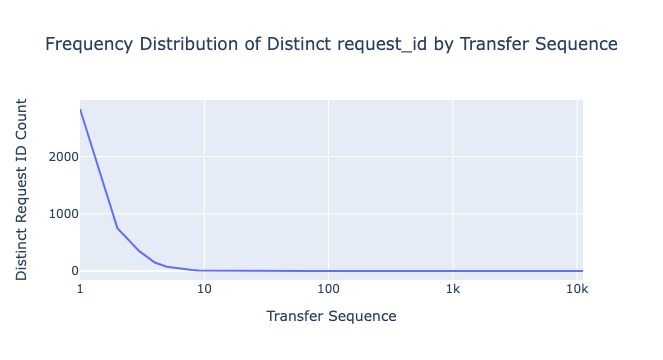

In [59]:
# Group by transfer_sequence and count distinct request_id
data = fsd_is_null.groupby('transfer_sequence')['request_id'].nunique().reset_index()

# Renaming columns for clarity
data.columns = ['transfer_sequence', 'distinct_request_id_count']

# Frequency plot
fig3 = px.line(data, x='transfer_sequence', y='distinct_request_id_count',
             title='Frequency Distribution of Distinct request_id by Transfer Sequence',
             labels={'transfer_sequence': 'Transfer Sequence', 'distinct_request_id_count': 'Distinct Request ID Count'})

# Modify xaxis and title layout
fig3.update_layout(
    xaxis_type='log',
    # yaxis_type='log',
    xaxis=dict(
        tickvals=[1, 10, 100, 1000, 10000],
        ticktext=['1', '10', '100', '1k', '10k'], 
    ),
    title={'x': 0.5},
)

fig3.show()


In [61]:
ts_greater_5 = fsd_is_null[fsd_is_null['transfer_sequence'] >= 5]
ts_greater_5.describe()

,date_user_created,date_request_submitted,date_request_received,date_request_transferred,date_request_cancelled,invoice_value,invoice_value_cancel,flag_transferred,transfer_sequence,days_since_previous_req,first_attempt_date,first_success_date
count,462,462,12,0,455,7.000000,455.000000,462.0,462.000000,462.000000,462,0
mean,2016-02-01 17:03:53.246753280,2016-04-16 08:10:36.753246976,2015-11-12 11:56:45,NaT,2016-04-19 20:51:20.703296768,2110.402642,12504.773272,0.0,1831.002165,6.385281,2016-02-18 02:41:36.103895808,NaT
min,2011-09-19 11:52:00,2012-05-11 09:44:00,2014-01-04 19:42:00,NaT,2012-05-11 09:48:00,50.000000,1.000000,0.0,5.000000,0.000000,2012-02-06 12:19:00,NaT
25%,2015-07-12 12:19:45,2015-11-05 01:09:15,2015-01-05 11:10:15,NaT,2015-11-05 10:06:30,459.847200,3.612794,0.0,6.000000,0.000000,2015-08-03 13:07:15,NaT
50%,2016-04-22 13:21:00,2016-08-19 15:03:30,2016-01-27 11:04:00,NaT,2016-08-22 11:33:00,1148.090000,143.961600,0.0,18.500000,0.000000,2016-05-15 15:26:30,NaT
75%,2016-11-15 07:45:00,2016-11-16 09:38:45,2016-11-10 13:14:30,NaT,2016-11-23 09:49:00,3522.617755,849.376340,0.0,3047.500000,0.000000,2016-11-15 09:12:00,NaT
max,2016-11-27 13:16:00,2016-12-06 14:29:00,2016-12-06 14:33:00,NaT,2016-12-06 08:06:00,5609.798586,881880.000000,0.0,11166.000000,502.000000,2016-12-03 00:10:00,NaT
std,NaN,NaN,NaN,NaN,NaN,2136.575952,89459.738442,0.0,3063.353994,39.540786,NaN,NaN


In [63]:
ts_greater_5.agg({'user_id':'nunique', 'request_id':'nunique'})

user_id       271
request_id    462
dtype: int64

/var/folders/cj/mjyzb9257zv77l3r38yxnslw0000gn/T/ipykernel_64823/925170625.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



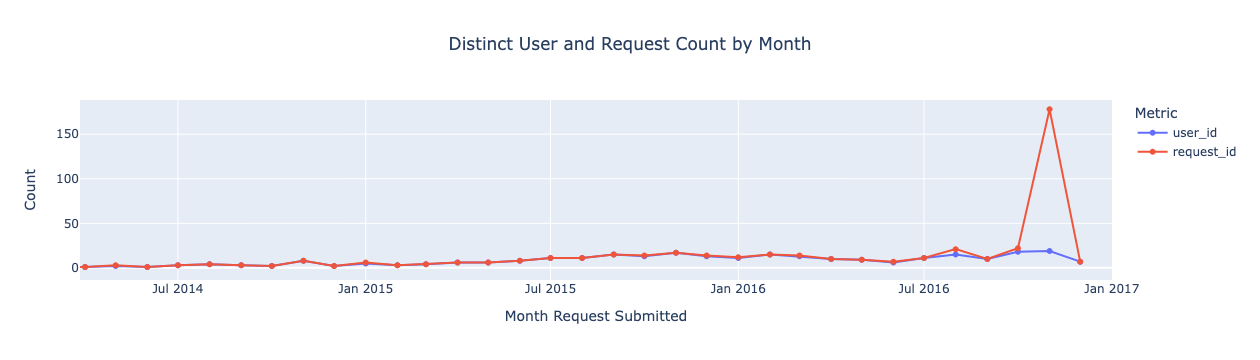

In [65]:
ts_greater_5['month_request_submitted'] = ts_greater_5['date_request_submitted'].dt.to_period('M')
result = ts_greater_5.groupby('month_request_submitted').agg({
    'user_id': 'nunique',      # Count distinct user_id
    'request_id': 'nunique'    # Count distinct request_id
}).sort_values(by = 'month_request_submitted', ascending = False).reset_index()

result['month_request_submitted'] = result['month_request_submitted'].astype(str)

# Create the line graph
fig4 = px.line(
    result,
    x='month_request_submitted',
    y=['user_id', 'request_id'],
    markers=True,
    title='Distinct User and Request Count by Month',
    labels={
        'month_request_submitted': 'Month Request Submitted',
        'value': 'Count',
        'variable': 'Metric'
    }
)

fig4.update_layout(
    title={'x': 0.5},
)

fig4.show()

In [67]:
# Merging the results for the whole df and for just thos that have first successful date null and transaction_sequence > 5
# This allows for an estimate of the % of total request affected by month
merged_results = pd.merge(
    result_df,
    result,
    on='month_request_submitted',  
    how='left',
    suffixes=('_full', '_blocked')
)
merged_results['user % blocked'] = merged_results.user_id_blocked/merged_results.user_id_full*100
merged_results['request % blocked'] = merged_results.request_id_blocked/merged_results.request_id_full*100
merged_results.sort_values(by = 'request % blocked', ascending = False)


,month_request_submitted,user_id_full,request_id_full,invoice_value,invoice_value_cancel,user_id_blocked,request_id_blocked,user % blocked,request % blocked
55,2012-05,12,12,3.905431e+03,3.115800e+02,1.0,1.0,8.333333,8.333333
1,2016-11,6656,6942,7.862151e+06,3.789140e+06,19.0,178.0,0.285457,2.564103
35,2014-01,290,293,4.041276e+05,2.265961e+05,3.0,3.0,1.034483,1.023891
25,2014-11,1254,1272,1.183964e+06,6.203962e+05,8.0,8.0,0.637959,0.628931
31,2014-05,505,507,6.548816e+05,1.114434e+05,2.0,3.0,0.396040,0.591716
...,...,...,...,...,...,...,...,...,...
65,2011-07,3,3,3.185239e+03,0.000000e+00,NaN,NaN,NaN,NaN
66,2011-06,4,4,1.067809e+04,0.000000e+00,NaN,NaN,NaN,NaN
67,2011-05,3,3,2.426708e+03,0.000000e+00,NaN,NaN,NaN,NaN
68,2011-03,4,4,4.897730e+03,0.000000e+00,NaN,NaN,NaN,NaN


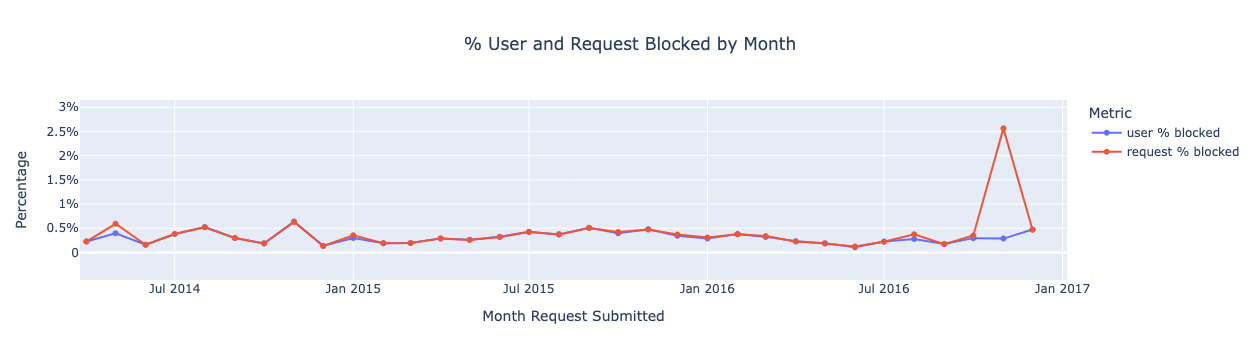

In [71]:
# Create the line graph
fig5 = px.line(
    merged_results,
    x='month_request_submitted',
    y=['user % blocked', 'request % blocked'],
    markers=True,
    title='% User and Request Blocked by Month',
    labels={
        'month_request_submitted': 'Month Request Submitted',
        'value': 'Percentage',
        'variable': 'Metric'
    }
)

# Modify yaxis ticks and title layout
fig5.update_layout(
    yaxis=dict(
        tickvals=[0, 0.5, 1, 1.5, 2, 2.5, 3],
        ticktext=['0', '0.5%', '1%','1.5%','2%','2.5%','3%'], 
    ),
    title={'x': 0.5},
)

fig5.show()

In [73]:
ts_greater_5_nov = ts_greater_5[ts_greater_5.month_request_submitted == '2016-11']
ts_greater_5_nov.groupby('user_id').agg({
    'request_id': 'nunique'    # Count distinct request_id
}).sort_values(by = 'request_id', ascending = False).reset_index()

,user_id,request_id
0,8917c69f0a728519439d93ba9b49005a,89
1,b78c8ce3f52611c3df21da6b9effe911,72
2,0b14d002578f34fc6e66fbcbd85a4349,1
3,880e195daaa3e6ce449159589b60a629,1
4,fc974bfbc7581f46c108ff792dafe093,1
5,e0fa848bfb6fea61c4c0fd7be1b596ba,1
6,d28543b351c803eba074b02d82d13ba3,1
7,a9f16a894f546b556148adfac7c5a4d7,1
8,8fc33415de3d51d1bf039d2caa7fa735,1
9,7bc8a3c3e5767b5bf49cae0964eb87a8,1


# Hypothesis 2:
### Time difference between submitted and cancelled

In [76]:
# Looking only at requests that have been cancelled
df_cancelled_request = df[df['date_request_cancelled'].notnull()]
df_cancelled_request.describe()

,date_user_created,date_request_submitted,date_request_received,date_request_transferred,date_request_cancelled,invoice_value,invoice_value_cancel,flag_transferred,transfer_sequence,days_since_previous_req,first_attempt_date,first_success_date
count,22259,22259,1169,0,22259,0.0,2.225900e+04,22259.0,22259.000000,16688.000000,22259,17824
mean,2015-07-13 02:45:29.233118976,2015-12-25 13:34:32.882878720,2015-12-16 12:55:28.023952128,NaT,2015-12-30 03:34:58.126600704,NaN,2.844942e+03,0.0,67.386855,24.655081,2015-08-03 09:33:36.236129024,2015-08-02 16:49:36.840215552
min,2011-01-25 12:50:00,2012-02-27 17:13:00,2013-07-09 14:32:00,NaT,2012-02-28 17:26:00,NaN,9.109000e-02,0.0,1.000000,0.000000,2010-06-01 10:32:00,2010-06-03 12:21:00
25%,2014-12-23 09:03:30,2015-07-14 17:55:00,2015-07-13 10:53:00,NaT,2015-07-20 11:39:00,NaN,2.062090e+02,0.0,1.000000,0.000000,2015-01-21 12:56:00,2015-01-22 11:32:00
50%,2015-08-13 23:53:00,2016-02-05 22:25:00,2016-01-25 16:32:00,NaT,2016-02-10 08:33:00,NaN,6.700000e+02,0.0,4.000000,1.000000,2015-09-04 12:50:00,2015-09-07 09:09:30
75%,2016-02-27 13:34:00,2016-07-26 09:33:30,2016-07-07 13:36:00,NaT,2016-07-29 13:45:00,NaN,1.600000e+03,0.0,12.000000,21.000000,2016-03-20 05:45:30,2016-03-18 09:25:15
max,2016-12-06 07:10:00,2016-12-06 14:52:00,2016-12-06 07:06:00,NaT,2016-12-06 15:11:00,NaN,1.013231e+06,0.0,18915.000000,1160.000000,2016-12-06 13:58:00,2016-12-06 14:19:00
std,NaN,NaN,NaN,NaN,NaN,NaN,2.220656e+04,0.0,638.728980,66.276638,NaN,NaN


In [78]:
# Only very few of the cancelled request actually have a date received, why?
df_received_cancelled_request = df_cancelled_request[df_cancelled_request.date_request_received.notnull()]

# Binning results into hours to do a frequancy analysis
df_received_cancelled_request['hours_received_to_cancel'] = ((df_received_cancelled_request['date_request_cancelled'] - df_received_cancelled_request['date_request_received']).dt.total_seconds() / 3600).round().astype(int)
# df_received_cancelled_request['hours_submit_to_cancel'] = ((df_received_cancelled_request['date_request_cancelled'] - df_received_cancelled_request['date_request_submitted']).dt.total_seconds() / 3600).round().astype(int)

df_received_cancelled_request.describe()

/var/folders/cj/mjyzb9257zv77l3r38yxnslw0000gn/T/ipykernel_64823/1881316570.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date_user_created,date_request_submitted,date_request_received,date_request_transferred,date_request_cancelled,invoice_value,invoice_value_cancel,flag_transferred,transfer_sequence,days_since_previous_req,first_attempt_date,first_success_date,hours_received_to_cancel
count,1169,1169,1169,0,1169,0.0,1169.000000,1169.0,1169.000000,804.000000,1169,873,1169.000000
mean,2015-06-15 19:56:37.929854464,2015-12-15 22:52:50.761334784,2015-12-16 12:55:28.023952128,NaT,2015-12-20 04:47:31.719418368,NaN,1298.574366,0.0,240.792130,29.373134,2015-07-05 20:16:40.085543168,2015-06-18 08:10:14.226804224,87.863131
min,2012-11-13 10:34:00,2013-07-09 12:07:00,2013-07-09 14:32:00,NaT,2013-07-14 10:36:00,NaN,0.200000,0.0,1.000000,0.000000,2012-11-21 12:47:00,2012-11-22 09:02:00,-1468.000000
25%,2014-11-28 09:17:00,2015-07-13 10:53:00,2015-07-13 10:53:00,NaT,2015-07-15 11:42:00,NaN,100.000000,0.0,1.000000,0.000000,2014-12-22 21:09:00,2014-12-02 08:01:00,0.000000
50%,2015-07-31 10:40:00,2016-01-25 16:03:00,2016-01-25 16:32:00,NaT,2016-01-28 10:31:00,NaN,396.180000,0.0,3.000000,4.000000,2015-08-13 21:37:00,2015-07-29 08:08:00,28.000000
75%,2016-02-08 20:23:00,2016-07-07 12:54:00,2016-07-07 13:36:00,NaT,2016-07-11 11:48:00,NaN,1108.927833,0.0,12.000000,24.000000,2016-03-01 15:46:00,2016-02-29 09:38:00,137.000000
max,2016-11-26 01:48:00,2016-12-03 15:52:00,2016-12-06 07:06:00,NaT,2016-12-06 12:04:00,NaN,34586.200000,0.0,17987.000000,1016.000000,2016-11-26 11:58:00,2016-11-29 16:36:00,2880.000000
std,NaN,NaN,NaN,NaN,NaN,NaN,3038.931683,0.0,1372.226985,75.294425,NaN,NaN,197.184624


In [80]:
# Sorting to checkout the ones with longest difference from received to cancel
df_received_cancelled_request.sort_values(by = 'hours_received_to_cancel', ascending = False).head(10)

,user_id,request_id,target_recipient_id,date_user_created,addr_country_code,addr_city,recipient_country_code,flag_personal_business,payment_type,date_request_submitted,date_request_received,date_request_transferred,date_request_cancelled,invoice_value,invoice_value_cancel,flag_transferred,payment_status,ccy_send,ccy_target,transfer_to_self,sending_bank_name,sending_bank_country,payment_reference_classification,device,transfer_sequence,days_since_previous_req,first_attempt_date,first_success_date,month_request_submitted,hours_received_to_cancel
8149,ffc3c911792f96fce5ce388889fb88a7,ced8b59d7b2b9250f23dd1bba6b90220,51fe655fe6b2f1bfb1e81f7cc4eca262,2015-02-11 11:19:00,GBR,Burnage,BE,Personal,Cards,2015-03-15 16:05:00,2015-03-15 16:06:00,NaT,2015-07-13 15:45:00,NaN,447.680000,0,Cancelled,GBP,EUR,Other Recipient,Other/unknown,Other/unknown,rent,Desktop Web,1.0,NaN,2015-03-15 16:05:00,NaT,2015-03,2880
8126,fce2865814b90c688a15f55e781b0020,d98dd50a907351d747db18d973b1f6a3,81a9e159655db2ddd92808b73aecb2db,2014-02-18 11:53:00,DNK,Copenhagen,IN,Personal,NaN,2014-12-15 11:29:00,2014-12-17 10:13:00,NaT,2015-04-16 07:43:00,NaN,3402.090000,0,Cancelled,DKK,INR,Self-recipient: Email match,Other/unknown,Other/unknown,rent,Desktop Web,9.0,14.0,2014-02-18 11:59:00,2014-02-20 11:04:00,2014-12,2878
24585,0696491471cb5dfbec12c242c36affa2,c5d1ce2edf22bbf3fb898fd27f04c9ec,95d23c387806bd81f48e9530d754851f,2014-10-31 00:00:00,GBR,Harrow,IN,Personal,Cards,2014-12-27 00:06:00,2014-12-27 00:07:00,NaT,2015-04-16 15:16:00,NaN,412.310000,0,Cancelled,GBP,INR,N.A. Recipient Email Unknown,Other/unknown,Other/unknown,blank,Mobile Web,15.0,2.0,2014-11-03 11:45:00,2014-11-04 13:15:00,2014-12,2655
40572,73e3dba2fa89d8589a5e24501997042f,23022b70677f4b06776189199f7486de,bc717ea24183823911168c3b463e60f7,2015-10-26 17:25:00,GBR,Canary wharf,US,Personal,NaN,2016-06-20 09:47:00,2016-06-20 10:03:00,NaT,2016-09-03 12:01:00,NaN,2099.110000,0,Cancelled,GBP,USD,Other Recipient,HSBC BANK PLC,GB,Other/unknown,iOS App,9.0,23.0,2015-10-27 09:51:00,2015-11-04 05:57:00,2016-06,1802
84044,d203d746c1c568741bc43493ad83ab93,25d85c7ed6b980270155c9620ce71c7e,8bd88b66d93ad8a95b063e51d450df4c,2014-09-16 19:13:00,CHE,St. Gallen,CH,Personal,Bank Transfer,2014-09-24 15:30:00,2014-09-24 15:33:00,NaT,2014-11-18 10:26:00,NaN,760.615189,0,Cancelled,EUR,CHF,N.A. Sender or Recipient is business,Other/unknown,Other/unknown,bills,Desktop Web,1.0,NaN,2014-09-24 15:30:00,2014-10-02 12:40:00,2014-09,1315
93897,6bb241aaf312b9d343c24bf8ac132d8a,0da0ae89f70733a3fce8c3108a167fbc,907278df039c041c392dfe3f7ff613d1,2015-04-21 08:38:00,USA,Los Angeles,CH,Business,Direct Debit,2015-10-27 14:26:00,2015-10-27 14:27:00,NaT,2015-12-08 18:12:00,NaN,201.034416,0,Cancelled,USD,CHF,N.A. Sender or Recipient is business,Other/unknown,Other/unknown,invoice,Desktop Web,5.0,186.0,2015-04-21 08:46:00,2015-04-24 21:36:00,2015-10,1012
37269,2e346782848970087b3749bb4bbdc6d7,8d42a13637e99afafb322299ed0fa19c,0de5d5d0073a8986988e503a9f7fa74b,2014-08-16 11:53:00,DNK,Karise,NO,Personal,NaN,2014-08-26 18:47:00,2014-08-28 09:45:00,NaT,2014-10-09 07:47:00,NaN,135.516585,0,Cancelled,DKK,NOK,N.A. Sender or Recipient is business,Other/unknown,Other/unknown,invoice,Desktop Web,2.0,8.0,2014-08-18 16:41:00,2014-08-20 11:47:00,2014-08,1006
54012,5f5064ea2f3ccf1c11a0d248bda3b7e7,001b4f7728b659bb2d38c1db06e715f8,17bb0f2eb503ae2bbf7a25e499b3235d,2015-12-23 16:04:00,GBR,Oxford,AE,Personal,NaN,2016-07-29 11:39:00,2016-07-29 12:24:00,NaT,2016-09-01 13:48:00,NaN,100.000000,0,Cancelled,GBP,AED,N.A. Recipient Email Unknown,NATIONAL WESTMINSTER BANK PLC,GB,wedding,Desktop Web,2.0,56.0,2016-06-02 15:19:00,2016-06-03 10:03:00,2016-07,817
37104,749e62bc12a96491ef312cb0349f4fd9,755455d41444234fec9d62ad476681d2,c2ea64c5dadc2d31da7cba64dd0f8de9,2016-09-25 19:45:00,GBR,Bournemouth,DE,Personal,Cards,2016-09-29 19:43:00,2016-09-29 19:43:00,NaT,2016-10-27 13:42:00,NaN,22.000000,0,Cancelled,GBP,EUR,Self-recipient: Name match,Other/unknown,Other/unknown,blank,Deskto

In [82]:
# How long does it take on averge for the transfer to happen from the moment wise receives the money?
df_transferred = df[df.date_request_transferred.notnull()]

# Because there are two requests with a transfer date but no receive date these two have to be dropped
df_transferred = df_transferred[~df_transferred['request_id'].isin(['4b6919643f6f154958989493784a62e0', '331c3559bd95d6eae0d6919026e1b972'])]

# Binning results
df_transferred['hours_received_to_transferred'] = ((df_transferred['date_request_transferred'] - df_transferred['date_request_received']).dt.total_seconds() / 3600).round().astype(int)
df_transferred.describe()

,date_user_created,date_request_submitted,date_request_received,date_request_transferred,date_request_cancelled,invoice_value,invoice_value_cancel,flag_transferred,transfer_sequence,days_since_previous_req,first_attempt_date,first_success_date,hours_received_to_transferred
count,77374,77374,77374,77374,0,77374.000000,0.0,77374.0,77374.000000,67798.000000,77374,77373,77374.000000
mean,2015-04-13 20:39:54.832372480,2016-01-02 13:15:00.584692480,2016-01-02 23:24:18.498461952,2016-01-03 14:46:59.853439232,NaT,1393.183386,NaN,1.0,49.872451,28.243562,2015-05-04 09:04:45.416806656,2015-05-12 15:07:06.848900864,15.364916
min,2011-01-23 13:54:00,2011-02-04 12:28:00,2011-02-08 18:45:00,2011-02-08 21:04:00,NaT,0.781898,NaN,1.0,1.000000,0.000000,2010-05-28 09:26:00,2010-06-01 19:25:00,-19.000000
25%,2014-09-15 07:12:45,2015-07-29 16:40:00,2015-07-29 23:48:00,2015-07-30 11:53:30,NaT,152.844732,NaN,1.0,3.000000,2.000000,2014-10-01 15:43:45,2014-10-10 09:05:00,1.000000
50%,2015-05-05 00:26:30,2016-03-05 10:55:00,2016-03-06 01:37:00,2016-03-07 09:42:00,NaT,425.000000,NaN,1.0,8.000000,12.000000,2015-06-01 16:56:00,2015-06-12 07:23:00,5.000000
75%,2015-12-15 18:31:30,2016-08-07 22:17:45,2016-08-08 11:56:30,2016-08-08 16:44:00,NaT,1076.820000,NaN,1.0,20.000000,30.000000,2016-01-12 03:27:00,2016-01-20 08:43:00,17.000000
max,2016-12-06 05:47:00,2016-12-06 14:24:00,2016-12-06 14:32:00,2016-12-06 15:22:00,NaT,688221.600000,NaN,1.0,19069.000000,1274.000000,2016-12-06 12:02:00,2016-12-06 15:05:00,1844.000000
std,NaN,NaN,NaN,NaN,NaN,6222.861425,NaN,0.0,555.991987,56.727447,NaN,NaN,28.648365


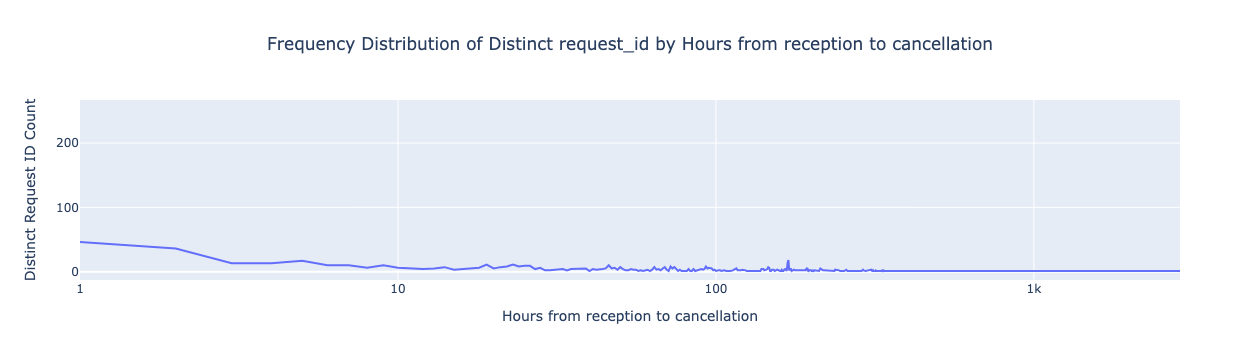

In [84]:
# Group by transfer_sequence and count distinct request_id
data = df_received_cancelled_request.groupby('hours_received_to_cancel')['request_id'].nunique().reset_index()

# Renaming columns for clarity
data.columns = ['hours_received_to_cancel', 'distinct_request_id_count']

# Frequency plot
fig6 = px.line(data, x='hours_received_to_cancel', y='distinct_request_id_count',
             title='Frequency Distribution of Distinct request_id by Hours from reception to cancellation',
             labels={'hours_received_to_cancel': 'Hours from reception to cancellation', 'distinct_request_id_count': 'Distinct Request ID Count'})

# Modify xaxis and title layout
fig6.update_layout(
    xaxis_type='log',
    # yaxis_type='log',
    xaxis=dict(
        tickvals=[1, 10, 100, 1000, 10000],
        ticktext=['1', '10', '100', '1k', '10k'], 
    ),
    title={'x': 0.5},
)

fig6.update_layout(
    title={'x': 0.5},
)


fig6.show()

In [90]:
df_received_cancelled_request[df_received_cancelled_request.hours_received_to_cancel > 72]

,user_id,request_id,target_recipient_id,date_user_created,addr_country_code,addr_city,recipient_country_code,flag_personal_business,payment_type,date_request_submitted,date_request_received,date_request_transferred,date_request_cancelled,invoice_value,invoice_value_cancel,flag_transferred,payment_status,ccy_send,ccy_target,transfer_to_self,sending_bank_name,sending_bank_country,payment_reference_classification,device,transfer_sequence,days_since_previous_req,first_attempt_date,first_success_date,month_request_submitted,hours_received_to_cancel
573,04dfb7e79cffcafbc7184c31b0ebc262,c4cc4b60e7c178f269be76c55b0bee4d,8074b2ee3704f34b3acb3f291ec6d6ab,2015-09-12 10:46:00,NLD,Zelhem,NL,Personal,Cards,2016-03-16 16:41:00,2016-03-16 16:45:00,NaT,2016-03-21 08:08:00,NaN,1175.000000,0,Cancelled,GBP,EUR,Self-recipient: Exact name match,HSBC BANK PLC,GB,Other/unknown,Desktop Web,2.0,186.0,2015-09-12 10:52:00,2015-09-14 07:20:00,2016-03,111
749,bec433fd1fe3a9b3e89ef15dac6ae612,1eaceedf7a77ce495ef6fe4e0b0511f6,573c547f6ae2e78fb41e9e5631336352,2015-11-30 17:30:00,GRL,ilulissat,PH,Personal,Cards,2016-11-11 21:57:00,2016-11-11 21:58:00,NaT,2016-11-16 08:25:00,NaN,723.568750,0,Cancelled,DKK,PHP,Self-recipient: Email match,TELLER A/S,DK,blank,iOS App,18.0,0.0,2015-12-01 17:48:00,2015-12-03 07:51:00,2016-11,106
768,79ac9dd5b43e06691a08c93aa5d7792f,d1d7d30775197ef39655f25748461436,e64c97f00d8239af0d437c04ff4251b8,2016-02-22 17:19:00,GBR,London,BR,Personal,Cards,2016-11-17 15:16:00,2016-11-17 15:18:00,NaT,2016-12-01 12:22:00,NaN,50.000000,0,Cancelled,GBP,BRL,Self-recipient: Email match,Other/unknown,Other/unknown,blank,Mobile Web,2.0,211.0,2016-04-19 21:55:00,2016-04-20 13:25:00,2016-11,333
815,eb7d8621b0e718b9d2d410afc738e9a2,a605487978066047e4f69d247f456749,6844762e4e20194311022ea37592c422,2015-11-20 10:49:00,GBR,Oxford,IN,Business,NaN,2015-11-20 10:59:00,2015-11-20 12:47:00,NaT,2015-11-24 19:41:00,NaN,625.000000,0,Cancelled,GBP,INR,N.A. Sender or Recipient is business,HSBC BANK PLC,GB,Other/unknown,Desktop Web,1.0,NaN,2015-11-20 10:59:00,NaT,2015-11,103
1012,47a5e47e822b575937f8281bd6fbf809,63a9e8be537042c7ec18b0ae6550f960,28b70a2d0a03c42796d29ade8779e255,2016-05-30 04:42:00,AUS,MANLY,GB,Business,NaN,2016-06-17 03:59:00,2016-06-17 17:57:00,NaT,2016-06-21 07:18:00,NaN,412.294802,0,Cancelled,AUD,GBP,N.A. Sender or Recipient is business,Other/unknown,Other/unknown,invoice,Desktop Web,4.0,0.0,2016-06-09 03:15:00,2016-06-14 10:19:00,2016-06,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99092,e8cc3269c380a0da37eb6f153e9504e1,1814c31f4d170ad81ddfda424c9b2286,1ddd369ad28c26098350f2ca9ebaffde,2015-02-27 12:19:00,GBR,Cambridge,ES,Personal,NaN,2015-08-18 18:15:00,2015-08-19 07:01:00,NaT,2015-08-27 19:25:00,NaN,600.000000,0,Cancelled,GBP,EUR,"Family (Last Matches, 1st name different)",SANTANDER UK PLC,GB,blank,Desktop Web,5.0,67.0,2015-02-27 12:36:00,2015-02-27 13:05:00,2015-08,204
99120,c6d4d12d31ecf2e39603aeeab48e7b14,eb8068e7e8692503e9d1419a05fc9451,1735421093f498fe44ccfad47e46162b,2014-01-04 18:09:00,NOR,Fenstad,DE,Personal,Cards,2014-01-04 18:25:00,2014-01-04 19:42:00,NaT,2014-01-11 15:26:00,NaN,80.000000,0,Cancelled,GBP,EUR,N.A. Recipient Email Unknown,Other/unknown,Other/unknown,blank,Desktop Web,17.0,0.0,2014-01-04 18:17:00,NaT,2014-01,164
99429,ee3c5912b889164fd24387a17ced5a8a,e3b6ba49017742bf7d4df7145e6ae1a5,29337d6aafc9615d51cebd9c201a49bc,2016-05-08 21:04:00,SWE,Malmo,BR,Personal,Cards,2016-05-08 21:13:00,2016-05-08 21:17:00,NaT,2016-05-12 07:11:00,NaN,501.889400,0,Cancelled,SEK,BRL,Other Recipient,SKANDINAVISKA ENSKILDA BANKEN AB,SE,Other/unknown,Desktop Web,1.0,NaN,2016-05-08 21:13:00,2016-05-23 13:54:00,2016-05,82
99701,2e9d2ca591b26118d59e0ac256041de3,583bd9819e999e8d6dd98a9ca4a36971,58af69d445ac07bbd027638f92b1862d,2016-01-28 14:12:00,GBR,london,ID,Personal,Cards,2016-09-12 20:15:00,2016-09-12 20:17:00,NaT,2016-09-26 09:24:00,NaN,236.390000,0,Cancelled,GBP,IDR,Ot

In [92]:
df_transferred[df_transferred.hours_received_to_transferred > 72]

,user_id,request_id,target_recipient_id,date_user_created,addr_country_code,addr_city,recipient_country_code,flag_personal_business,payment_type,date_request_submitted,date_request_received,date_request_transferred,date_request_cancelled,invoice_value,invoice_value_cancel,flag_transferred,payment_status,ccy_send,ccy_target,transfer_to_self,sending_bank_name,sending_bank_country,payment_reference_classification,device,transfer_sequence,days_since_previous_req,first_attempt_date,first_success_date,month_request_submitted,hours_received_to_transferred
18,ab48d00ca0365e2a0950890642f96406,d4ee12c0229885f9ac5c6bbf27b4496d,d38807a7d668f2069351f23f30cb0bc0,2015-09-21 18:17:00,IRL,Mayo,IE,Personal,Insta Debit,2016-10-14 19:53:00,2016-10-14 20:03:00,2016-10-18 07:35:00,NaT,62.414800,NaN,1,Transferred,CAD,EUR,Self-recipient: Exact name match,Other/unknown,Other/unknown,blank,Desktop Web,19.0,38.0,2015-10-09 10:33:00,2015-10-09 10:37:00,2016-10,84
51,5c8c435fcead8f7683649b8c7e54dd90,c3a8938b3e875b9beec998daf978dda1,77e7b03c18c8550014e0a4d5a2f6b343,2015-04-06 11:33:00,ESP,LA OROTAVA,GB,Business,Bank Transfer,2015-05-04 17:54:00,2015-05-06 11:50:00,2015-05-13 12:11:00,NaT,2211.915000,NaN,1,Transferred,EUR,GBP,N.A. Sender or Recipient is business,Other/unknown,Other/unknown,invoice,Desktop Web,1.0,NaN,2015-05-04 17:54:00,2015-05-13 12:11:00,2015-05,168
85,46cadcfff22a382be78e3a758ac45779,109ea00755c2e57877544f72d4fb6767,e0e7a2a73f5abec5a8958928c37d949a,2015-04-17 06:51:00,USA,Woodbury,NZ,Personal,Direct Debit,2015-04-17 07:04:00,2015-04-17 07:08:00,2015-04-21 11:36:00,NaT,668.339714,NaN,1,Transferred,USD,NZD,Self-recipient: Exact name match,Other/unknown,Other/unknown,blank,Desktop Web,1.0,NaN,2015-04-17 07:04:00,2015-04-21 11:36:00,2015-04,100
156,26098e6b89f5d2da7c10bda19277810c,c9752d1b0f6c776fe4be58ac82be881b,d5c1ae29eddb6135e6eec0804e371d71,2015-03-04 20:15:00,GBR,London,HU,Personal,Cards,2015-08-28 17:51:00,2015-08-28 17:52:00,2015-09-03 05:32:00,NaT,36.840000,NaN,1,Transferred,GBP,HUF,N.A. Sender or Recipient is business,BARCLAYS BANK PLC,GB,blank,Desktop Web,7.0,56.0,2015-03-04 20:29:00,2015-03-05 08:51:00,2015-08,132
200,0f36cfce5738c1f4eb90da4e61b6cc74,270e2ef118d6a42e2d6a9d7c01440cde,b457f16565e0afa71709e6ead8cec20d,2016-10-04 17:48:00,ESP,Madrid,MX,Personal,Trustly,2016-10-07 21:08:00,2016-10-07 21:12:00,2016-10-11 16:10:00,NaT,405.455850,NaN,1,Transferred,EUR,MXN,Self-recipient: Email match,Other/unknown,Other/unknown,blank,Desktop Web,2.0,1.0,2016-10-06 17:30:00,2016-10-06 18:57:00,2016-10,91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99822,fc58fd3cc2d0ec392a57d457a2ff7543,638d90ed7e3b38eb4735c014468c693a,5bd964f9af0814a3f0f47f4b43cec88c,2016-10-12 15:51:00,CAN,Toronto,BR,Personal,Insta Debit,2016-10-12 15:59:00,2016-10-12 16:05:00,2016-10-17 13:04:00,NaT,43.221360,NaN,1,Transferred,CAD,BRL,N.A. Recipient Email Unknown,Other/unknown,Other/unknown,blank,Desktop Web,1.0,NaN,2016-10-12 15:59:00,2016-10-17 13:04:00,2016-10,117
99823,ea2d0c531a669302b1b27052057e7080,9c1d634c3b50654c19398d98ca8a86a7,b491bfe953e06e42463e0d8b8cf79e78,2015-07-14 02:36:00,USA,Richmond,GB,Personal,Direct Debit,2015-07-14 02:40:00,2015-07-14 02:45:00,2015-07-21 18:07:00,NaT,1010.537983,NaN,1,Transferred,USD,GBP,Other Recipient,Other/unknown,Other/unknown,Other/unknown,Desktop Web,1.0,NaN,2015-07-14 02:40:00,2015-07-21 18:07:00,2015-07,183
99875,215d2f614229b22d92dfb305aab465b8,f89c5ddcfef674bb943ce1d23ef6c31b,fbedb86fdd6bbcdc1850bcbfb40575e6,2016-03-15 19:37:00,DEU,Duisburg,TH,Personal,Bank Transfer,2016-03-25 11:41:00,2016-03-25 11:42:00,2016-03-29 15:25:00,NaT,308.179560,NaN,1,Transferred,EUR,THB,N.A. Recipient Email Unknown,VOLKSBANK,DE,blank,Desktop Web,2.0,0.0,2016-03-25 11:34:00,2016-03-29 15:25:00,2016-03,100
99908,ff82db7535530637af7f8a96284b3459,46464aba3b53e4067102c68f13648ad9,8edda0ffdcc31b32b8e0cd18818f7fac,2012-12-03 18:17:00,GBR,London,SE,Personal,Bank Transfer,2

# Hypothesis 3
### High frequency request

In [95]:
df = df.sort_values(by=['user_id', 'date_request_submitted'])

# Calculate seconds since the previous request
df['minutes_since_previous_request'] = df.groupby(['user_id'])['date_request_submitted'].diff().dt.total_seconds()/60
df_fast_txn = df[df.minutes_since_previous_request <= 1].sort_values(by = ['user_id', 'date_request_submitted'], ascending = False)
df_fast_txn.describe()

,date_user_created,date_request_submitted,date_request_received,date_request_transferred,date_request_cancelled,invoice_value,invoice_value_cancel,flag_transferred,transfer_sequence,days_since_previous_req,first_attempt_date,first_success_date,minutes_since_previous_request
count,294,294,117,113,180,114.000000,180.000000,294.000000,294.000000,293.000000,294,136,294.000000
mean,2016-04-24 20:53:27.959183872,2016-10-10 06:04:21.224489728,2016-09-11 18:51:49.230769408,2016-09-12 03:37:13.805309696,2016-11-04 19:04:12.333333504,77.077795,83.970533,0.384354,5987.809524,0.382253,2016-05-05 12:18:43.061224448,2015-10-10 03:06:54.705882368,0.248299
min,2014-03-21 16:11:00,2014-12-19 06:12:00,2014-12-19 06:13:00,2014-12-19 07:44:00,2015-04-30 22:06:00,0.854224,1.077196,0.000000,1.000000,0.000000,2014-03-21 16:11:00,2014-03-24 08:11:00,0.000000
25%,2016-08-02 08:59:00,2016-09-18 13:24:30,2016-09-06 09:44:00,2016-09-06 11:52:00,2016-11-23 09:24:45,7.070000,3.575998,0.000000,2422.250000,0.000000,2016-08-02 10:49:00,2014-08-10 03:42:45,0.000000
50%,2016-11-15 07:45:00,2016-11-16 09:27:30,2016-09-27 14:28:00,2016-09-27 14:59:00,2016-11-23 09:56:00,7.200000,3.612794,0.000000,4701.500000,0.000000,2016-11-15 09:12:00,2016-07-20 14:06:00,0.000000
75%,2016-11-15 07:45:00,2016-11-19 06:57:45,2016-10-05 11:29:00,2016-10-05 13:19:00,2016-11-29 09:25:00,9.072500,3.612794,1.000000,8799.250000,0.000000,2016-11-15 09:12:00,2016-08-02 11:52:00,0.000000
max,2016-11-28 20:54:00,2016-12-06 07:49:00,2016-12-06 10:45:00,2016-12-06 11:25:00,2016-11-29 10:19:00,2225.410000,4300.000000,1.000000,19055.000000,108.000000,2016-11-28 21:01:00,2016-12-02 19:26:00,1.000000
std,NaN,NaN,NaN,NaN,NaN,323.736952,492.153491,0.487272,4775.712499,6.312954,NaN,NaN,0.432763


In [97]:
df_fast_txn['user_id'].nunique()

28

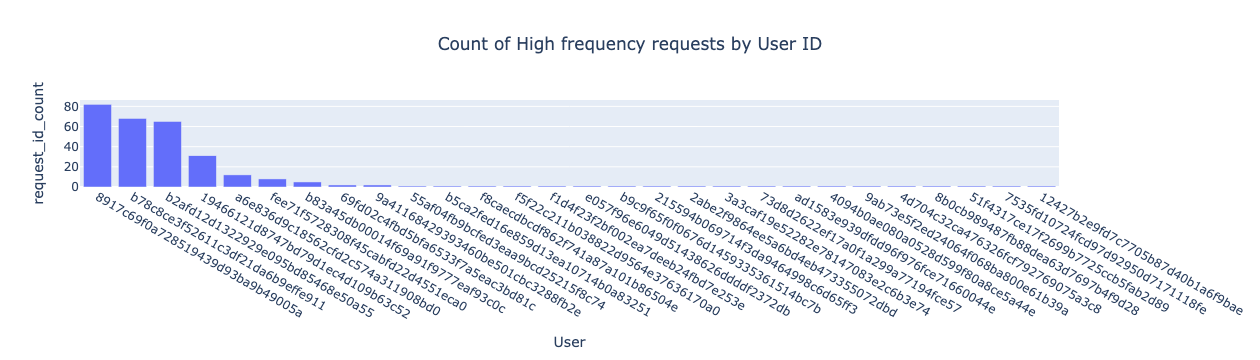

In [99]:
# Group by transfer_sequence and count distinct request_id
data = df_fast_txn.groupby('user_id')['request_id'].nunique().reset_index()

# Renaming columns for clarity
data.columns = ['user_id', 'request_id_count']

data = data.sort_values(by = 'request_id_count', ascending = False)
# Frequency plot
fig7 = px.bar(data, x='user_id', y='request_id_count',
             title='Count of High frequency requests by User ID',
             labels={'user_id': 'User', 'distinct_request_id_count': 'High Frequncy Request Count'},
             height=500)

# Centering the title 
fig7.update_layout(
    title={'x': 0.5},
)

fig7.show()

In [101]:
df_fast_txn[df_fast_txn.user_id == '8917c69f0a728519439d93ba9b49005a']

,user_id,request_id,target_recipient_id,date_user_created,addr_country_code,addr_city,recipient_country_code,flag_personal_business,payment_type,date_request_submitted,date_request_received,date_request_transferred,date_request_cancelled,invoice_value,invoice_value_cancel,flag_transferred,payment_status,ccy_send,ccy_target,transfer_to_self,sending_bank_name,sending_bank_country,payment_reference_classification,device,transfer_sequence,days_since_previous_req,first_attempt_date,first_success_date,month_request_submitted,minutes_since_previous_request
23971,8917c69f0a728519439d93ba9b49005a,caa1e47c66b9ee584b4fdfc8b429595e,81be15cefd8da370373fd4105fea03f8,2016-11-15 07:45:00,EST,Tallinn,GB,Personal,NaN,2016-11-16 09:50:00,NaT,NaT,2016-11-23 10:13:00,NaN,3.612794,0,Cancelled,EUR,GBP,Self-recipient: Exact name match,Other/unknown,Other/unknown,test,Desktop Web,11105.0,0.0,2016-11-15 09:12:00,NaT,2016-11,1.0
74018,8917c69f0a728519439d93ba9b49005a,2b85473c15dd2240e3f187adf96b66c2,81be15cefd8da370373fd4105fea03f8,2016-11-15 07:45:00,EST,Tallinn,GB,Personal,NaN,2016-11-16 09:50:00,NaT,NaT,2016-11-23 10:13:00,NaN,3.612794,0,Cancelled,EUR,GBP,Self-recipient: Exact name match,Other/unknown,Other/unknown,test,Desktop Web,11166.0,0.0,2016-11-15 09:12:00,NaT,2016-11,0.0
97986,8917c69f0a728519439d93ba9b49005a,44ad846b7ae5153cd4ac002dfaac3e54,81be15cefd8da370373fd4105fea03f8,2016-11-15 07:45:00,EST,Tallinn,GB,Personal,NaN,2016-11-16 09:50:00,NaT,NaT,2016-11-23 10:13:00,NaN,3.612794,0,Cancelled,EUR,GBP,Self-recipient: Exact name match,Other/unknown,Other/unknown,test,Desktop Web,11159.0,0.0,2016-11-15 09:12:00,NaT,2016-11,0.0
23986,8917c69f0a728519439d93ba9b49005a,209546534888166d2c3769447b25f238,81be15cefd8da370373fd4105fea03f8,2016-11-15 07:45:00,EST,Tallinn,GB,Personal,NaN,2016-11-16 09:49:00,NaT,NaT,2016-11-23 10:12:00,NaN,3.612794,0,Cancelled,EUR,GBP,Self-recipient: Exact name match,Other/unknown,Other/unknown,test,Desktop Web,10934.0,0.0,2016-11-15 09:12:00,NaT,2016-11,1.0
55483,8917c69f0a728519439d93ba9b49005a,233bdc9c89a28be5c57e5c5eb8128192,81be15cefd8da370373fd4105fea03f8,2016-11-15 07:45:00,EST,Tallinn,GB,Personal,NaN,2016-11-16 09:49:00,NaT,NaT,2016-11-23 10:12:00,NaN,3.612794,0,Cancelled,EUR,GBP,Self-recipient: Exact name match,Other/unknown,Other/unknown,test,Desktop Web,10840.0,0.0,2016-11-15 09:12:00,NaT,2016-11,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78680,8917c69f0a728519439d93ba9b49005a,a99697f90d793d0b8c87297628b5a487,81be15cefd8da370373fd4105fea03f8,2016-11-15 07:45:00,EST,Tallinn,GB,Personal,NaN,2016-11-16 09:24:00,NaT,NaT,2016-11-23 09:17:00,NaN,3.612794,0,Cancelled,EUR,GBP,Self-recipient: Exact name match,Other/unknown,Other/unknown,test,Desktop Web,1745.0,0.0,2016-11-15 09:12:00,NaT,2016-11,0.0
76456,8917c69f0a728519439d93ba9b49005a,1171f37e9a21e2c5d14050e47e6210d3,0d4c8a842f3b6c6d2dc0a0d01d03d763,2016-11-15 07:45:00,EST,Tallinn,US,Personal,NaN,2016-11-15 13:19:00,NaT,NaT,2016-11-23 09:13:00,NaN,3.616977,0,Cancelled,EUR,USD,Self-recipient: Name match,Other/unknown,Other/unknown,test,Desktop Web,1148.0,0.0,2016-11-15 09:12:00,NaT,2016-11,0.0
71077,8917c69f0a728519439d93ba9b49005a,256da52679fa1ea8dec17558c28327c2,0d4c8a842f3b6c6d2dc0a0d01d03d763,2016-11-15 07:45:00,EST,Tallinn,US,Personal,NaN,2016-11-15 12:43:00,NaT,NaT,2016-11-23 09:09:00,NaN,3.616977,0,Cancelled,EUR,USD,Self-recipient: Name match,Other/unknown,Other/unknown,test,Desktop Web,470.0,0.0,2016-11-15 09:12:00,NaT,2016-11,1.0
9803,8917c69f0a728519439d93ba9b49005a,f207e7d9301f624591cb7c2a94a3d120,0d4c8a842f3b6c6d2dc0a0d01d03d763,2016-11-15 07:45:00,EST,Tallinn,US,Personal,NaN,2016-11-15 12:42:00,NaT,NaT,2016-11-23 09:09:00,NaN,3.616977,0,Cancelled,EUR,USD,Self-recipient: Name match,Other/unknown,Other/unknown,test,Desktop Web,396.0,0.0,2016-11-15 09:12:00,NaT,2016-11,1.0


In [103]:
df_10min_txn = df[df.minutes_since_previous_request <= 10].sort_values(by = ['user_id', 'date_request_submitted'], ascending = False)
df_10min_txn.user_id.nunique()

139

In [105]:
data = df_10min_txn.groupby('user_id')['request_id'].nunique().reset_index()
data.columns = ['user_id', 'request_id_count']
data = data.sort_values(by = 'request_id_count', ascending = False)
data[data.request_id_count >= 2].user_id.nunique()

14

# Group bys

In [108]:
result = df.agg({'user_id':'nunique', 'request_id':'nunique'})
print(result)

user_id       89434
request_id    99996
dtype: int64


In [110]:
df[df['flag_transferred'] == False].head()

,user_id,request_id,target_recipient_id,date_user_created,addr_country_code,addr_city,recipient_country_code,flag_personal_business,payment_type,date_request_submitted,date_request_received,date_request_transferred,date_request_cancelled,invoice_value,invoice_value_cancel,flag_transferred,payment_status,ccy_send,ccy_target,transfer_to_self,sending_bank_name,sending_bank_country,payment_reference_classification,device,transfer_sequence,days_since_previous_req,first_attempt_date,first_success_date,month_request_submitted,minutes_since_previous_request
69875,000377831c340e395b28fb773ee1531a,97d9f9763fb388f03f2fa4865f8237f6,df254381052aee87f8f0e9b6ef4c6848,2015-09-04 13:39:00,ITA,Sannicandro di Bari,US,Personal,NaN,2015-10-15 16:41:00,NaT,NaT,2015-10-29 17:06:00,NaN,2003.101776,0,Cancelled,EUR,USD,N.A. Sender or Recipient is business,Other/unknown,Other/unknown,blank,Android App,2.0,41.0,2015-09-04 14:56:00,2015-09-08 20:03:00,2015-10,NaN
86061,00038fa368af8f3928d88cc04e38fde7,0780079aaff80d919dc40b12e54cca81,8bd58bd5f1b418eaf055cf01c7ba08c5,2015-07-10 03:46:00,GBR,blantyre,AU,Personal,Cards,2015-12-06 01:59:00,NaT,NaT,2015-12-06 02:04:00,NaN,230.000000,0,Cancelled,GBP,AUD,Self-recipient: Email match,Other/unknown,Other/unknown,Other/unknown,Android App,4.0,64.0,2015-07-10 03:52:00,2015-07-10 11:00:00,2015-12,NaN
7659,000c6ab2ca28861e11e9376e9885859e,7e099c0fa613f7451dbf4dd95dbbe21a,e715b1be00b3c5837dfe6032a248883a,2016-10-17 18:31:00,ESP,madrid,ES,Personal,NaN,2016-10-17 23:59:00,NaT,NaT,2016-11-01 08:06:00,NaN,896.532000,0,Cancelled,BRL,EUR,Self-recipient: Email match,Other/unknown,Other/unknown,blank,Desktop Web,2.0,0.0,2016-10-17 19:31:00,NaT,2016-10,NaN
55060,000e0060b89af1706db93e289527a88d,e7feced7c63e0964996f6f761ff3e613,98205474cadbcac2ebb10391aa1a9f03,2015-10-15 23:08:00,GBR,Aberdeen,GB,Personal,NaN,2016-09-09 15:30:00,NaT,NaT,2016-09-09 15:30:00,NaN,338.584400,0,Cancelled,EUR,GBP,Self-recipient: Email match,Other/unknown,Other/unknown,blank,iOS App,51.0,13.0,2015-10-16 16:45:00,2015-10-16 17:31:00,2016-09,NaN
91084,000ec57d479bb94abccf305a16fb61c1,0b11f1a1a0010c5a09df972a44cc6ba0,67d4ec70e55779315c6b5fe408e111cb,2015-12-01 07:40:00,THA,"T. Mae Hai, A. Mueng, Chiang Mai",NL,Personal,NaN,2016-07-07 08:53:00,NaT,NaT,2016-07-07 08:53:00,NaN,2537.178122,0,Cancelled,USD,EUR,Other Recipient,Other/unknown,Other/unknown,blank,Desktop Web,3.0,113.0,2015-12-01 07:49:00,2015-12-07 17:49:00,2016-07,NaN


In [112]:
# Group by flag_personal_business
result = df.groupby('flag_personal_business').agg({'user_id':'nunique', 'request_id':'nunique'}).sort_values(by = 'user_id', ascending = False)
print(result)

                        user_id  request_id
flag_personal_business                     
Personal                  85301       93618
Business                   4375        6378


### Group by payment_type

In [115]:
result = df.groupby('payment_type').agg({'user_id':'nunique', 'request_id':'nunique'}).sort_values(by = 'user_id', ascending = False)
print(result)

                    user_id  request_id
payment_type                           
Cards                 42472       46446
Bank Transfer         24222       27051
Direct Debit           5503        5862
Boleto                 1034        1061
Poli                    321         329
Insta Debit             278         282
Trustly                  79          79
Number26                 63          66
Apple Pay - Adyen        20          20
iDeal - Adyen            10          10
Manual Payment            9          10
Kapcharge                 5           5
TW Balance Payment        1           1


### Group by payment_status

In [117]:
result = df.groupby('payment_status').agg({'user_id':'nunique', 'request_id':'nunique'}).sort_values(by = 'user_id', ascending = False)
print(result)

                user_id  request_id
payment_status                     
Transferred       69631       77376
Cancelled         21368       22259
Pending             358         361


### Group by transfer_sequence

In [120]:
result = df.groupby('transfer_sequence').agg({'user_id':'nunique', 'request_id':'nunique'}).sort_values(by = 'user_id', ascending = False)
print(result)

                   user_id  request_id
transfer_sequence                     
1.0                  15221       15221
2.0                   9734        9734
3.0                   7288        7288
4.0                   5901        5901
5.0                   5076        5076
...                    ...         ...
1386.0                   1           1
1390.0                   1           1
1396.0                   1           1
1398.0                   1           1
19069.0                  1           1

[1200 rows x 2 columns]


In [122]:
result = df.groupby('transfer_to_self').agg({'user_id':'nunique', 'request_id':'nunique'}).sort_values(by = 'user_id', ascending = False)
print(result)

                                           user_id  request_id
transfer_to_self                                              
Self-recipient: Email match                  24565       26385
Self-recipient: Exact name match             15210       16435
N.A. Recipient Email Unknown                 14518       15433
Other Recipient                              13567       14278
N.A. Sender or Recipient is business         10991       13242
Family (Last Matches, 1st name different)     9408       10003
Self-recipient: Name match                    3879        4220


In [124]:
result = df.groupby('payment_reference_classification').agg({'user_id':'nunique', 'request_id':'nunique'}).sort_values(by = 'user_id', ascending = False)
print(result)

                                  user_id  request_id
payment_reference_classification                     
blank                               45911       49755
Other/unknown                       26374       28075
invoice                              4721        5378
monthly                              3480        3676
family                               2013        2068
rent                                 1496        1542
generic                              1367        1407
self_transfer                        1013        1042
gift                                  830         841
house                                 778         807
savings                               724         750
loan                                  705         740
travel                                571         575
bills                                 531         542
deposit                               500         509
expense                               398         407
test                        

In [125]:
result = df.groupby('device').agg({'user_id':'nunique', 'request_id':'nunique'}).sort_values(by = 'user_id', ascending = False)
print(result)

             user_id  request_id
device                          
Desktop Web    63218       70184
iOS App        13222       14324
Android App     7529        8164
Mobile Web      7040        7324


In [126]:
result = df.groupby('days_since_previous_req').agg({'user_id':'nunique', 'request_id':'nunique'}).sort_values(by = 'user_id', ascending = False)
print(result)

                         user_id  request_id
days_since_previous_req                     
0.0                        18756       20882
1.0                         3553        3615
2.0                         2704        2730
3.0                         2491        2522
6.0                         2432        2460
...                          ...         ...
571.0                          1           1
572.0                          1           1
575.0                          1           1
578.0                          1           1
1274.0                         1           1

[650 rows x 2 columns]


In [128]:
result = df.groupby('sending_bank_country').agg({'user_id':'nunique', 'request_id':'nunique'}).sort_values(by = 'user_id', ascending = False)
print(result)

                      user_id  request_id
sending_bank_country                     
Other/unknown           48514       51826
GB                      30301       33704
DE                       2738        2891
ES                       1971        2086
FR                       1504        1580
IE                       1387        1533
IT                        662         700
BE                        515         538
AU                        491         511
DK                        430         446
NL                        420         437
SE                        418         444
US                        411         442
FI                        324         412
NO                        305         330
EE                        278         356
NZ                        244         249
AT                        233         247
PL                        230         240
PT                        204         214
CH                        125         131
SK                        122     